<a href="https://colab.research.google.com/github/emranrakib62/Python-Basic-to-Advance-with-numphy-and-pundas/blob/main/iris_and_customdatasetipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded Successfully!
X shape: (150, 4)
y shape: (150,)

Train-Test Split Done!
X_train: (105, 4)
X_test: (45, 4)

Model Training Completed!

===== Logistic Regression Evaluation =====
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]
Accuracy: 0.9111
Precision: 0.9155
Recall (Sensitivity): 0.9111


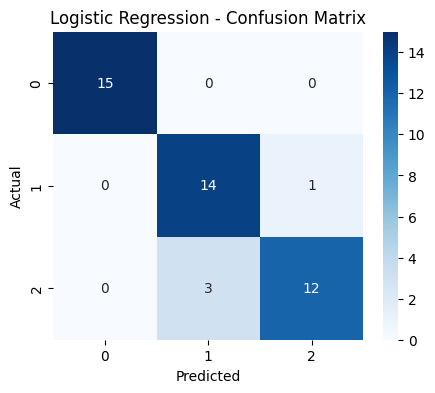


===== Decision Tree Evaluation =====
Confusion Matrix:
 [[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]
Accuracy: 0.9333
Precision: 0.9444
Recall (Sensitivity): 0.9333


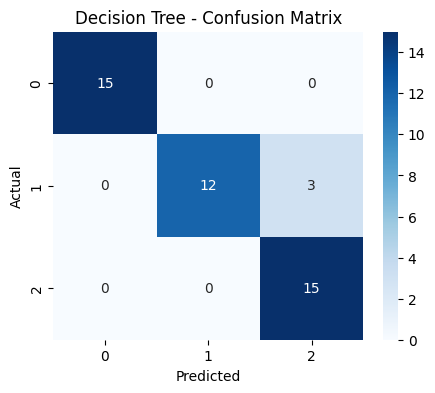


===== KNN Classifier Evaluation =====
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]
Accuracy: 0.9111
Precision: 0.9298
Recall (Sensitivity): 0.9111


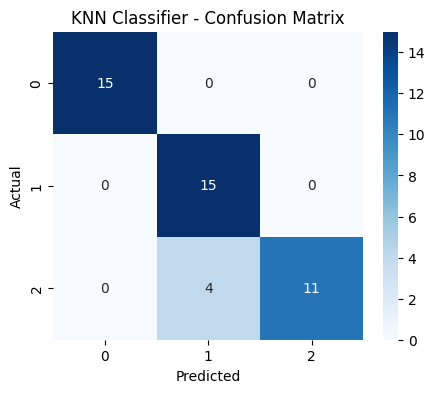

In [4]:
# ==============================
# 1. Load Dataset
# ==============================
import pandas as pd
from sklearn.datasets import load_iris

# You can switch between Iris dataset or a custom CSV
use_custom_dataset = False  # Set True if using CSV

if use_custom_dataset:
    df = pd.read_csv(data.csv)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
else:
    data = load_iris()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = data.target

print("Dataset Loaded Successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)

# ==============================
# 2. Preprocessing
# ==============================
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode target if categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# 3. Train-Test Split
# ==============================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y if len(set(y))>1 else None
)

print("\nTrain-Test Split Done!")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

# ==============================
# 4. Train Models
# ==============================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# 1️⃣ Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# 2️⃣ Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# 3️⃣ KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nModel Training Completed!")

# ==============================
# 5. Evaluate Models
# ==============================
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    print(f"\n===== {model_name} Evaluation =====")
    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate all three models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "KNN Classifier")



===== Logistic Regression Evaluation =====
Confusion Matrix:
 [[ 4565     9]
 [    6 10420]]
Accuracy: 0.9990
Precision: 0.9989
Recall (Sensitivity): 0.9987


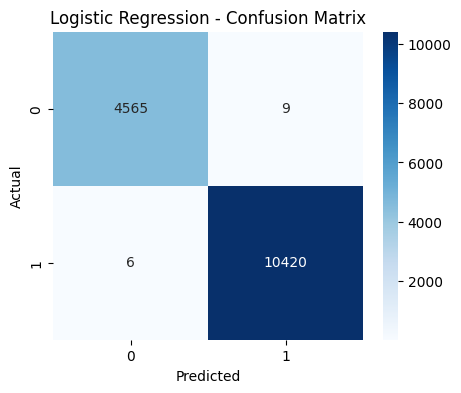


===== Decision Tree Evaluation =====
Confusion Matrix:
 [[ 4574     0]
 [    0 10426]]
Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000


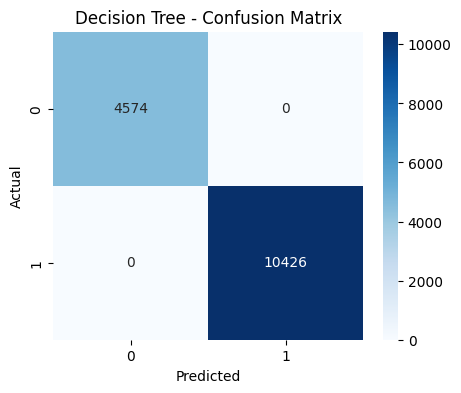


===== KNN Classifier Evaluation =====
Confusion Matrix:
 [[4091  483]
 [ 449 9977]]
Accuracy: 0.9379
Precision: 0.9275
Recall (Sensitivity): 0.9257


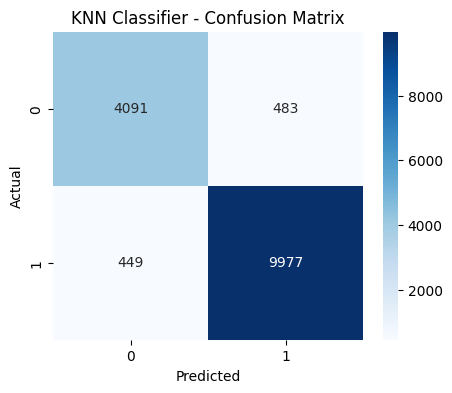

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your custom dataset
df = pd.read_csv("/content/BMW sales data (2010-2024) (1).csv")

# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode categorical columns
for col in X.select_dtypes(include=['object', 'category']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Encode target if it is categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    y = LabelEncoder().fit_transform(y)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Train models
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    print(f"\n===== {model_name} Evaluation =====")
    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate all three models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "KNN Classifier")
